## GA

Input: List of parameters generated by 30 Experiments 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools
import multiprocessing

In [2]:
input = [[0.6898330167041589, 0.6530578918719673, 0.5568011591309266, 569.3092254968585, 572.9727611518132, 0.20608501122036127, 0.39121075845362097, 0.4404098462179984, 0.6108540936356572, 0.7891559291370227],
         [0.5463124397722269, 0.5536493884304073, 0.7448769650009097, 410.9504474108928, 465.4000335061802, 0.1909984368668972, 0.2707532664111243, 0.4263228485068836, 0.5783354418916612, 0.849261898888879],
         [0.5967797167923482, 0.5422980740345935, 0.6623838794703792, 405.64362228455434, 432.6250466326269, 0.1666204956491792, 0.31957061991211855, 0.8642219172302985, 0.6530325205010876, 0.7078415626811172], 
         [0.6945739782623047, 0.7695637260894748, 0.7732282931611836, 402.7980811728346, 407.1726468102007, 0.15615425190471213, 0.19894803411082917, 0.8480789344082035, 0.6381185306077368, 0.7956289836860749], 
         [0.5676292867316112, 0.7828044389292026, 0.7603499755659355, 480.19310857321375, 583.9217097848026, 0.3191270096980961, 0.5769351373522362, 0.7937373659875041, 0.6010168306940024, 0.671593710386948],
         [0.7247288120627966, 0.6417910475686025, 0.8463889463123173, 436.37741014322893, 659.0804510033191, 0.1440875688436407, 0.20395507880349734, 0.9791904275615013, 0.5207465378156607, 0.6894017985943726], 
         [0.6061934816033442, 0.7809557771154602, 0.7804735863866055, 565.3473171196839, 670.3459805434699, 0.09991785749653255, 0.11462176122928591, 0.313976124553713, 0.6468047204425545, 0.6797740431422312], 
         [0.5550893400860845, 0.8474478321442654, 0.8131475937804118, 428.665875920067, 641.0419914898685, 0.18530151526760788, 0.3060426804508609, 0.853383023070676, 0.518771917354847, 0.5295787714771599], 
         [0.5437997004576788, 0.7880600648346108, 0.7673372283288529, 586.2810496002071, 745.2307691905913, 0.10975245023888527, 0.19031726407456387, 0.7234528763133418, 0.560597594777671, 0.7928279641797876], 
         [0.7920606250090366, 0.8443178918878681, 0.5748626736513521, 599.6050043291286, 715.9856246895455, 0.2716458248037394, 0.29657927509563914, 0.8295871714911718, 0.5302600514983887, 0.7915052433346041], 
         [0.5975654971076755, 0.7231339823713403, 0.6516816182847125, 508.9016088771247, 827.3316783447972, 0.03555625510352711, 0.036024459570453304, 0.8433241705774247, 0.5518708028656015, 0.63344825219852], 
         [0.6482243377147708, 0.6969970728965306, 0.6709505769083226, 472.7546283703023, 666.3550850945586, 0.26650527229376564, 0.33549159632908765, 0.7574517241926297, 0.502025674725469, 0.6222313143465277], 
         [0.6545545439800583, 0.8799832881677916, 0.8458131630442194, 419.23052708897, 784.6771784533557, 0.2582200808427697, 0.2691665790864372, 0.9656304098222408, 0.5511367336432934, 0.6578543488018102], 
         [0.6327714335815966, 0.5618481613090458, 0.76688313394634, 386.6603459335348, 593.8646670983153, 0.1526186775959084, 0.1614703967970087, 0.5869702807993522, 0.507499131688397, 0.6777054390654622], 
         [0.8462129591252698, 0.810761305205524, 0.6724343481406465, 429.5508525673816, 649.1693450274179, 0.1679243136056616, 0.29954315367441187, 0.5120006292340744, 0.5953193908304711, 0.7730645859901921], 
         [0.7140134029821222, 0.8307432186186585, 0.8938028574727894, 436.6138368858271, 771.1069447695613, 0.28464574806893095, 0.4729056231525247, 0.5309714196787836, 0.5053873557581053, 0.6569861311636599], 
         [0.5743185939666208, 0.7711865248830503, 0.637169478298675, 415.5261089573797, 618.9325130669956, 0.20267352485179835, 0.29991071669072344, 0.6207834182999554, 0.5529060605110495, 0.6409988269877015], 
         [0.7776215889881108, 0.8218136559957154, 0.7133911244532635, 487.64309157344985, 679.5475512439829, 0.39875860546818065, 0.5141453677166242, 0.5861780750167833, 0.5522157149131116, 0.6427916780997853], 
         [0.8063894191515463, 0.5831285792618229, 0.584115048179833, 508.1741390013941, 537.0167245277041, 0.31276815422591914, 0.5518516179037107, 0.5705556644387272, 0.6366789886704228, 0.7690603260713078], 
         [0.6854756169390257, 0.7295066782930033, 0.8789263394497291, 477.0995161229479, 719.3903417682193, 0.23908008325145982, 0.28322869363352693, 0.6501501175798052, 0.6259765440433603, 0.8432708071449655], 
         [0.8957492780363705, 0.5047784244547778, 0.801756564116719, 406.34292669589206, 807.134986200185, 0.016583455141110735, 0.031168459133220645, 0.691282473195847, 0.6714684764963049, 0.8999580037140154], 
         [0.7342750638228646, 0.675844512416797, 0.7370174334651329, 417.4025933920854, 756.8849929695269, 0.33119966028804376, 0.5476295415236804, 0.6201126594675562, 0.6041338719279848, 0.7011107445898915], 
         [0.765883860191342, 0.7875615117971566, 0.8923892710898078, 415.1727150902769, 442.31223802823513, 0.3314603976937373, 0.44185880249799875, 0.6496964744349868, 0.6629731646223391, 0.706428424890725], 
         [0.8791947531666375, 0.8889283689772027, 0.8658976710599176, 389.21665567105725, 619.6435129857334, 0.17526148921163495, 0.268165503278149, 0.36352569070737584, 0.5383994315078585, 0.6991574885569231], 
         [0.5929494023462301, 0.894540964692097, 0.5517956684468525, 532.1078922604698, 577.435645694599, 0.10650198412234317, 0.21291115593641607, 0.37772569596951233, 0.6283736870144214, 0.7530864981634828],
         [0.8919740514745923, 0.8886092696943333, 0.5231860607679916, 389.52055888655195, 714.9645488446223, 0.2970282957367241, 0.495957175479585, 0.6512711459005323, 0.6211888331356925, 0.7903719325473793], 
         [0.7553896949047778, 0.804132665596899, 0.8260293618819357, 586.7635652687215, 1020.909090920369, 0.36970674869951264, 0.380430177343535, 0.6689159227414103, 0.6886713433996627, 0.8258182638818932], 
         [0.8713122672315535, 0.7813642043809481, 0.8142687951086842, 578.061734697053, 728.2580397144384, 0.2579330891463358, 0.4913485276813374, 0.9349589265057217, 0.6145881338498443, 0.6629306497812969], 
         [0.8252694343422818, 0.837001157351088, 0.6988641974516876, 430.17294107727133, 430.3672565979107, 0.26849923952466936, 0.39476214992971126, 0.8545798861488951, 0.5746320744147683, 0.8252108752444629]
        ]

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [4]:
def load_individuals(creator):
    individuals = []
    for i in range(len(input)):
        individuals.append(creator(input[i]))
    return individuals

In [5]:
def evaluate(individual):
    return sum(individual),

In [6]:
def getMinMaxParameters():
    server_threshold = [0.5, 0.91] 
    ratio_almost_finished_jobs = [0.5, 0.91]
    time_remaining_for_power_off = [0.5, 0.91]
    shut_down_time = [370, 600]
    estimated_improv_threshold = [370, 1200] 
    alpha_min_server_lower_range = [0.01, 0.4]
    alpha_min_server_mid_range = [0.01, 0.4* 2]
    alpha_min_server_upper_range = [0.01, 1]
    alpha_lower = [0.5, 0.7]
    alpha_mid = [0.5, 0.9]
    return [min(server_threshold), min(ratio_almost_finished_jobs), min(time_remaining_for_power_off), min(shut_down_time),
            min(estimated_improv_threshold), min(alpha_min_server_lower_range), min(alpha_min_server_mid_range),
            min(alpha_min_server_upper_range), min(alpha_lower), min(alpha_mid)], \
           [max(server_threshold), max(ratio_almost_finished_jobs), max(time_remaining_for_power_off), max(shut_down_time),
            max(estimated_improv_threshold), max(alpha_min_server_lower_range), max(alpha_min_server_mid_range),
            max(alpha_min_server_upper_range), max(alpha_lower), max(alpha_mid)]

min, max = getMinMaxParameters()

In [21]:
toolbox = base.Toolbox()

#Register population based in the output of experiments
toolbox.register("population",load_individuals, creator.Individual)


pool = multiprocessing.Pool()
toolbox.register("map", pool.map)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxSimulatedBinaryBounded,eta=0.5, low=min, up=max)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=min, up=max,indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=2)

In [22]:
def plotConvergenceCurveOfRuns(log_generations):
    # x axis values 
    x = log_generations.select("gen")
    # corresponding y axis values
    y = log_generations.select("minFit")

    plt.plot(x, y) 

    plt.xlabel('Generations') 
    plt.ylabel('Best fitness') 

    plt.show()

In [23]:
def main():
    hof = tools.HallOfFame(1)
    log_generations = tools.Logbook()
    pop= toolbox.population()
    NGEN = 100
            
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
            
    for g in range(NGEN):
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
        for mutant in offspring:
            toolbox.mutate(mutant)
            del mutant.fitness.values
            
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit   
        
        pop[:] = offspring
            
        # Get the best of the generation
        fits = [ind.fitness.values[0] for ind in pop]
        minFit = np.amin(fits)
        std = np.std(fits)   
        
        log_generations.record(gen=g, minFit=minFit, std= std)
        
        hof.update(pop)    
    
    plotConvergenceCurveOfRuns(log_generations)
    return hof[0]

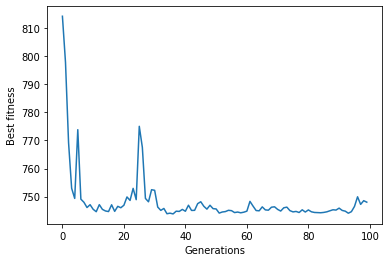

[0.5527246141955651, 0.6556782414457273, 0.6130385781355998, 370.16028534066123, 370.2533026929143, 0.1761178282207982, 0.03658019477414429, 0.08018510026516729, 0.5000030171055759, 0.8192097544480176]


In [24]:
if __name__=="__main__": 
    pop = main()
    print(pop)